## matplotlib

In [1]:
import numpy as np 
import matplotlib as mpl

print(f'numpy version : {np.__version__}') # version check
print(f'matplotlib version : {mpl.__version__}') # version check

numpy version : 1.23.5
matplotlib version : 3.5.2


<div>
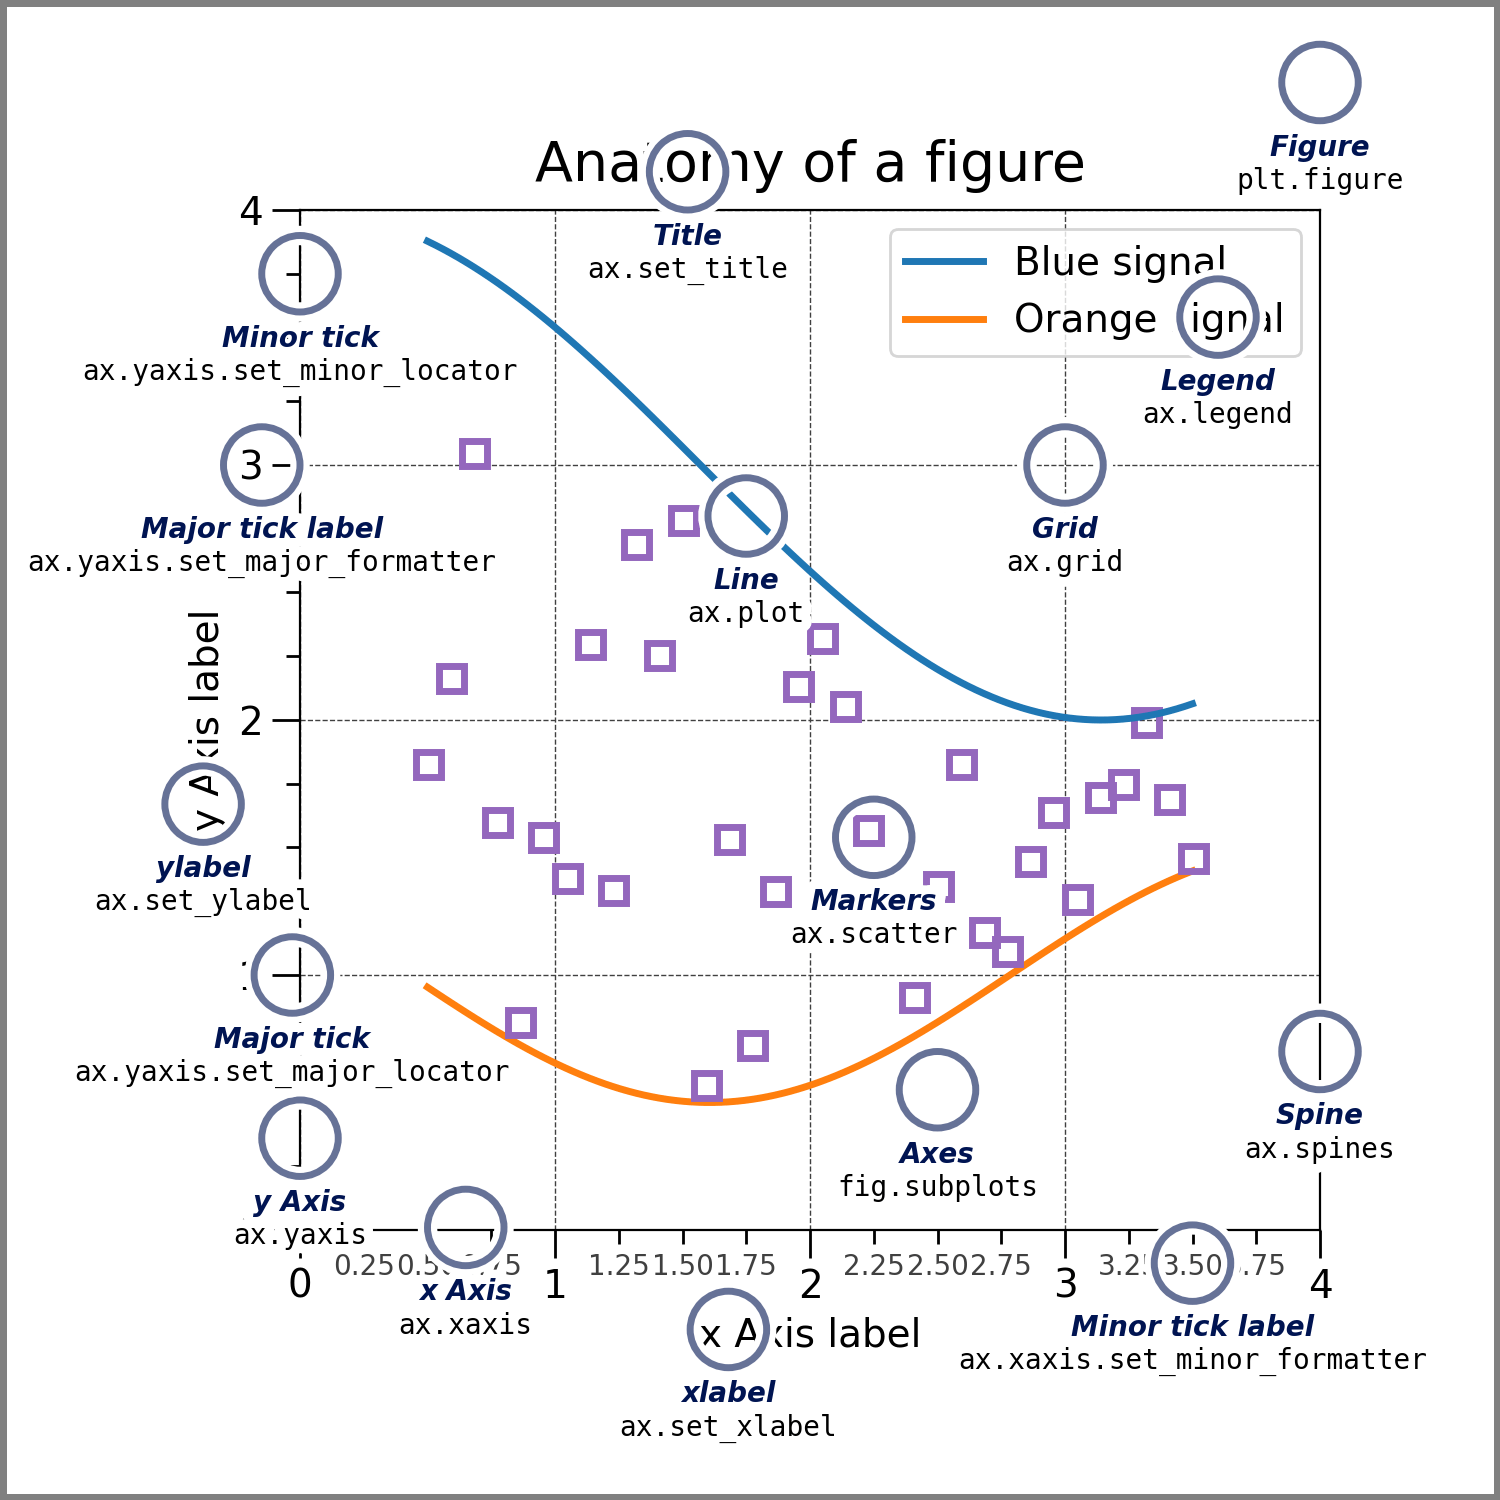
</div>

출처 : https://matplotlib.org/stable/tutorials/introductory/quick_start.html

### Matplotlib 한글 폰트 사용

- window : [참고](https://koosco.tistory.com/38)
- linux(wsl) : [참고](https://hooni-playground.com/961/)
- mac : `AppleGothic` 사용

In [2]:
import matplotlib.font_manager

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_install_location = [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_name = [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list]
print(f'font 설치 위치 : {font_install_location}', end='\n\n')
print(f'font 이름 : {font_name}')

RuntimeError: In FT2Font: Could not set the fontsize (error code 0x17)

In [3]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False


In [4]:
# availables styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-v0_8-bright')

OSError: 'seaborn-v0_8-bright' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## 그래프를 그리는 2가지 방식

### 1. plt에 그리기
add_subplot()을 통해 다음 ax로 넘어가 그래프를 그립니다.

### 2. ax에 직접 그리기
figure에 있는 각 ax에 직접적으로 그래프를 그립니다.

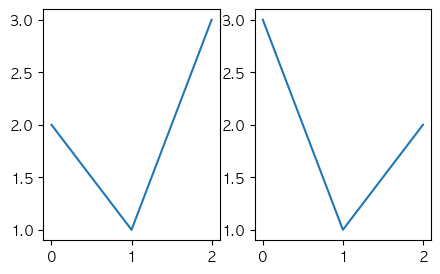

In [6]:
fig = plt.figure(figsize=(5,3)) # fig는 그래프 인스턴스들을 그릴 지면

x1 = [2, 1, 3]
x2 = [3, 1, 2]

# ax1에 그리기
ax1 = fig.add_subplot(1,2,1) # ax1는 그래프 인스턴스 하나를 의미
plt.plot(x1) 

# ax2에 그리기
ax2 = fig.add_subplot(1,2,2) 
plt.plot(x2) 
plt.show()

axes type : <class 'numpy.ndarray'>
[<AxesSubplot:> <AxesSubplot:>]


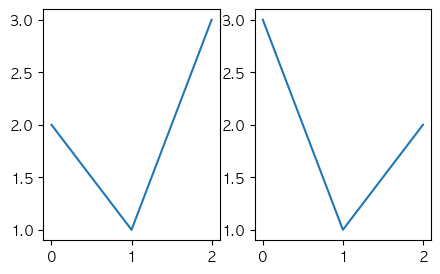

In [7]:
fig, axes = plt.subplots(1,2,figsize=(5,3)) # axes에 각 그래프 인스턴스가 들어있음

x1 = [2, 1, 3] 
x2 = [3, 1, 2]

axes[0].plot(x1)
axes[1].plot(x2)
print(f"axes type : {type(axes)}")
print(axes)

## 막대 그래프

- 양을 비교할 때 사용
- 시각 속성 중 높이와 위치를 활용하며 높이가 높을수록 값이 크고 모든 막대가 0이라는 위치에서 시작함


<BarContainer object of 5 artists>

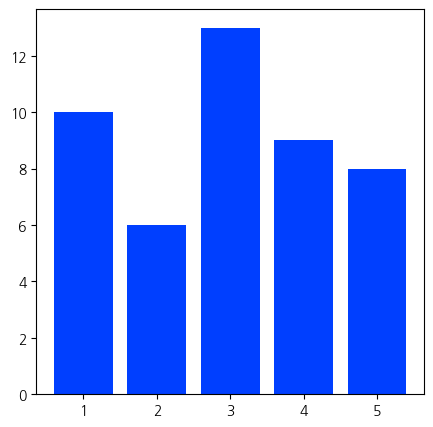

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = [1,2,3,4,5]
y = np.array([10,6,13,9,8])

ax.bar(x, y) # 세로 막대 그래프

### 막대 그래프 "위치"의 중요성

<BarContainer object of 5 artists>

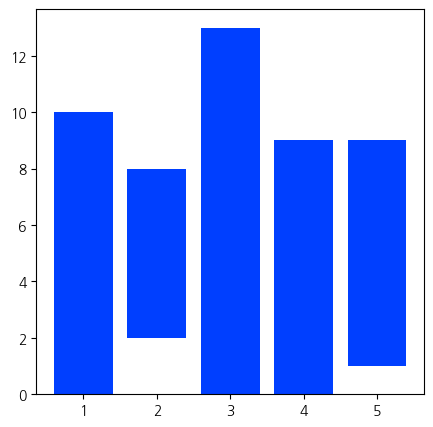

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, 
        bottom=np.random.choice(np.arange(5), size=5)
)

### 막대그래프는 0부터 시작

(5.0, 14.0)

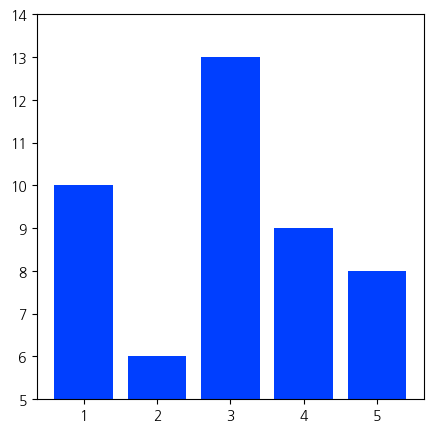

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y)
ax.set_ylim([5,14])

<BarContainer object of 5 artists>

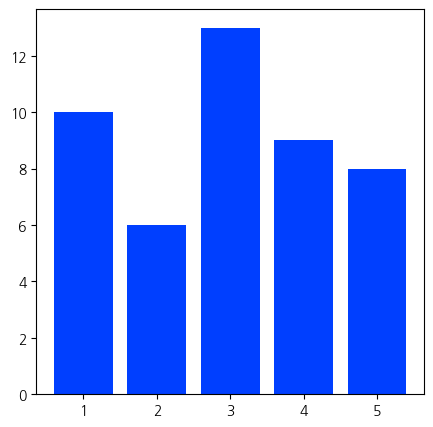

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, 
#         color='gray', 
#         label='label'
)

# ax.set_title('Title')
# ax.legend()
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)

# ax.tick_params(left = False, bottom = False)
# ax.set_yticks([])
# ax.set_xticks([])
# ax.grid()

### 데이터 불러오기

특정 프로그래밍 언어를 사용하는 개발자의 연봉

Age : 나이 

All_Devs : 총 개발자수

Python : Python을 쓰는 개발자의 연봉

JavaScript : JavaScript를 쓰는 개발자의 연봉

In [11]:
import pandas as pd

df = pd.read_csv('age_data.csv')
# df.head()       #df.head() 보다 추천 head는 bias가 들어갈 수 있음
df.sample(5)

,Age,All_Devs,Python,JavaScript
33,51,98988,108423,91660
21,39,79536,85000,80403
27,45,90000,93302,90000
34,52,100000,101407,99240
10,28,49320,57287,49293


### 20대 개발자 전체를 세로 막대 그래프로 시각화해보세요.

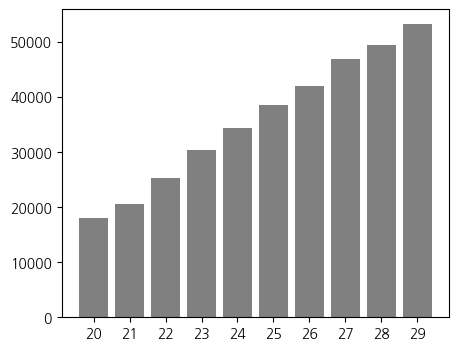

In [13]:
filtering_idx = (df['Age']>=20) & (df['Age']<30)
ages_x = df[filtering_idx]['Age']
dev_y = df[filtering_idx]['All_Devs']
py_dev_y = df[filtering_idx]['Python']

fig, ax = plt.subplots(figsize=(5, 4))

x_indexes = np.arange(len(ages_x)) 

ax.bar(x_indexes, dev_y, 
        color='gray', 
        label='All Devs')

# without this line our age range is lost, to fix this: 
ax.set_xticks(ticks=x_indexes, labels=ages_x)

### 파이썬 개발자와 전체 개발자의 나이대별 연봉 중간값을 비교해보세요

### Overlapped Bar Plot

- 투명도가 없을 경우, 더 작은 막대 그래프의 값은 볼 수 없습니다.

- 투명도를 조절하여 2개의 그래프를 비교해봅니다.
겹치는 부분이 Legend에 없는 색깔이므로 헷갈릴 수 있는 여지가 있습니다.

(비교시 그렇게 좋지 않았다고 생각 cuz 인지하기 어려움)

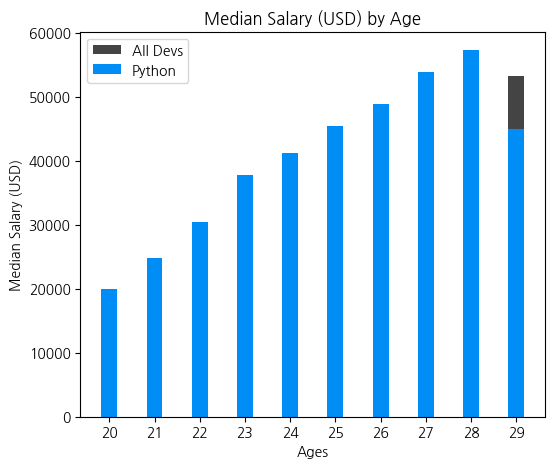

In [14]:
# side by side
fig, ax = plt.subplots(figsize=(6,5))
x_indexes = np.arange(len(ages_x)) 
bar_width = 0.35


ax.bar(x_indexes, 
       dev_y, 
       width=bar_width, 
       color='#444444', 
#        alpha=0.5,
       label='All Devs')

ax.bar(x_indexes, 
       py_dev_y, 
       width=bar_width, 
       color='#008df5',
#        alpha=0.5,
       label='Python')

# without this line our age range is lost, to fix this: 
ax.set_xticks(ticks=x_indexes, labels=ages_x)
ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")

ax.legend()
# plt.tight_layout()


### Grouped Bar Plot

- Legend에 있는 색깔 2개로만 표현(색의 수 줄이기)
- Overllaped Bar Plot보다 인지하기 쉬움

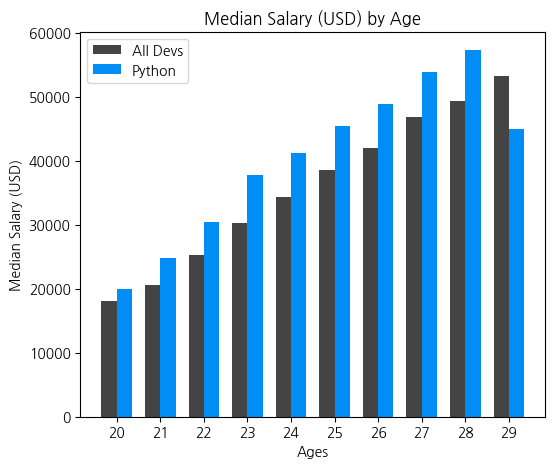

In [15]:
# side by side
fig, ax = plt.subplots(figsize=(6,5))
x_indexes = np.arange(len(ages_x)) 
bar_width = 0.35


ax.bar(x_indexes - bar_width/2,           #막대 가운데에 Index눈금이 들어가게 하기위해
       dev_y, 
       width=bar_width, 
       color='#444444', 
       label='All Devs')

ax.bar(x_indexes + bar_width/2,           #막대 가운데에 Index눈금이 들어가게 하기위해
       py_dev_y, 
       width=bar_width, 
       color='#008df5', 
       label='Python')

# without this line our age range is lost, to fix this: 
ax.set_xticks(ticks=x_indexes, labels=ages_x)
ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")

ax.legend()
# plt.tight_layout()


### Percentage Bar Plot

- 전체 비율을 비교할 때 사용합니다.

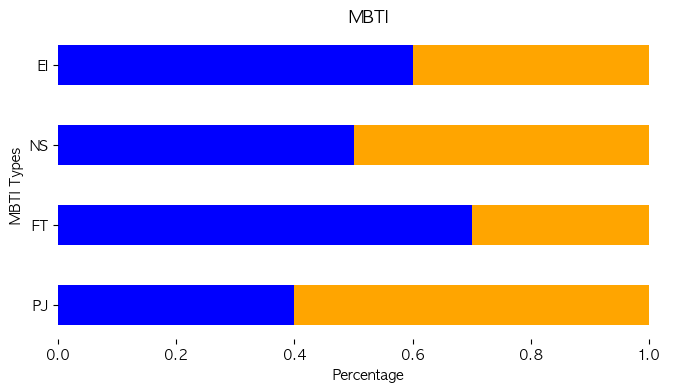

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the MBTI data
data = pd.DataFrame({
    'PJ': [0.4, 0.6],
    'FT': [0.7, 0.3],
    'NS': [0.5, 0.5],
    'EI': [0.6, 0.4]
})

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the ratio bar plot for 'ei'
ax.barh(data.columns, data.loc[0], height=0.5, color='blue')
ax.barh(data.columns, data.loc[1], height=0.5, left = data.loc[0], color='orange')
#left를넣어서 앞에 빈공간 만들고 그다음에 채우게 해서 한 막대그래프에 다 채워넣을 수 있음

# Add labels to the plot
ax.set_xlabel('Percentage')
ax.set_ylabel('MBTI Types')
ax.set_title("MBTI")

for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

# Show the plot
plt.show()


### 가로 막대 그래프
가로 막대 그래프는 비교해야할 대상이 많아질 때 지면이 부족해 표현하기 힘든 점을 보완하여 독자의 인지를 더 쉽게 도와줍니다. 

In [13]:
from collections import Counter
df = pd.read_csv('data.csv')
ids = df['Responder_id']
df.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [14]:
lang_responses = df['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))
    

languages = []
popularity = []
for lan, pop in language_counter.most_common(15):
    languages.append(lan)
    popularity.append(pop)

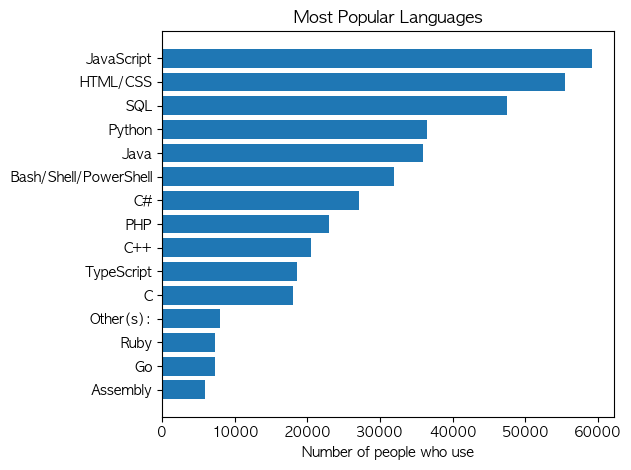

In [15]:
# plotting
fig, ax = plt.subplots()
languages.reverse()
popularity.reverse()
ax.barh(languages, popularity)      #barh 가로로
# plt.ylabel("Programming Languages")
ax.set_xlabel("Number of people who use")
ax.set_title("Most Popular Languages")

plt.tight_layout()

### 순서
특별한 순서가 없으면 내림차순 정렬을 하지만 순서가 있는 데이터는 순서를 맞춰줍니다.

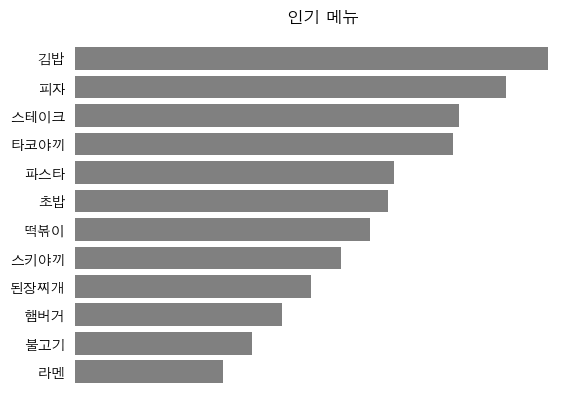

In [16]:
import seaborn as sns

fig, ax = plt.subplots()

food_type = ['한식','한식','한식','한식','일식','일식','일식','일식','양식','양식','양식','양식']
food = ['김밥','떡볶이','불고기','된장찌개','초밥','라멘','스키야끼','타코야끼','피자','파스타','스테이크','햄버거']
popularity = [80,50,30,40,53,25,45,64,73,54,65,35]

df = pd.DataFrame({"food_type":food_type,"food":food,"popularity":popularity}).sort_values(by='popularity')

colors = sns.color_palette('hls',len(df))

ax.barh(df['food'],
        df['popularity'],
        color = 'gray'                          #단색이 좋음 
        # color=colors
       )

ax.set_title('인기 메뉴')
ax.set_xticks([])

plt.tick_params(left = False, bottom = False)


for location in ['top','bottom','left','right']:
     ax.spines[location].set_visible(False)

plt.show()

### seaborn color palette
https://seaborn.pydata.org/generated/seaborn.color_palette.html

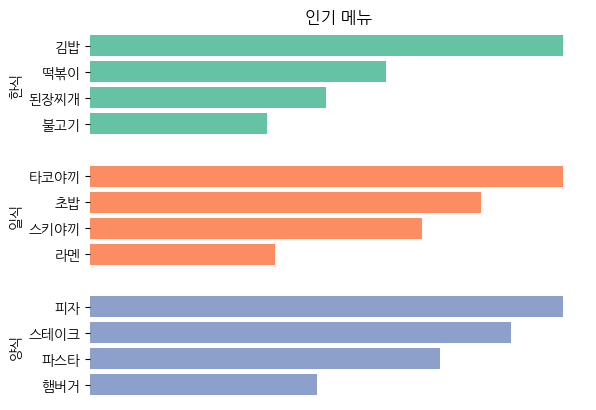

In [21]:
colors = sns.color_palette('Set2',3)

fig, axes = plt.subplots(3,1)
axes[0].set_title('인기 메뉴')

for idx, ft in enumerate(['한식','일식','양식']):
    axes[idx].barh(df[df['food_type']==ft]['food'],
            df[df['food_type']==ft]['popularity'],
            color = colors[idx]
           )

    
    axes[idx].set_xticks([])
    axes[idx].set_ylabel(ft)
    ax.tick_params(left = False, bottom = False)


    for location in ['top','bottom','left','right']:
         axes[idx].spines[location].set_visible(False)

plt.show()

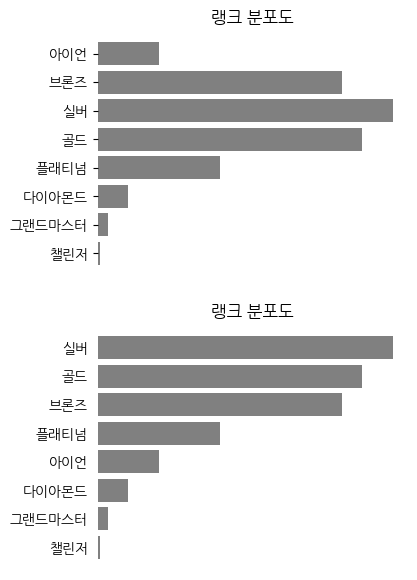

In [22]:
fig, axes = plt.subplots(2,1,figsize=(4,7))

level = ['아이언','브론즈','실버','골드','플래티넘','다이아몬드','그랜드마스터','챌린저']
popularity = [6,24,29,26,12,3,1,0.2]

df = pd.DataFrame({"level":level,"popularity":popularity}).sort_index(ascending=False)


for idx in range(2):
    if idx == 1:
        df = pd.DataFrame({"level":level,"popularity":popularity}).sort_values(by='popularity',ascending=True)
    axes[idx].barh(df['level'],
            df['popularity'],
            color = 'gray'
           )
    
    axes[idx].set_title('랭크 분포도')
    axes[idx].set_xticks([])
    plt.tick_params(left = False, bottom = False)


    for location in ['top','bottom','left','right']:
         axes[idx].spines[location].set_visible(False)


### Line Plot

데이터의 추세를 볼 때 주로 사용합니다.

In [23]:
# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

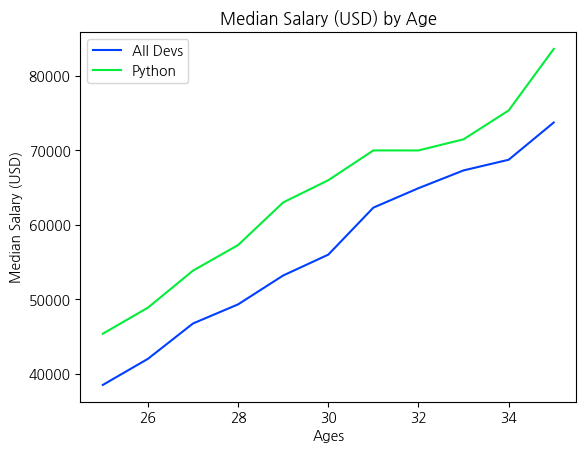

In [24]:
fig, ax = plt.subplots()

ax.plot(ages_x, dev_y, label='All Devs')
ax.plot(ages_x, py_dev_y, label='Python')

ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")

# adding legend
# method 1
# ax.legend(['All Devs', 'Python'])
# method 2 - pass a label argument to plot

ax.legend()

* Format Strings

A format string consists of a part for color, marker and line:
```python
fmt = '[marker][line][color]'
```


**Markers**

|character|	description|
|--|--|
|**.**|	point marker|
|**,**|	pixel marker|
|**o**|	circle marker|
|**v**|	triangle_down marker|
|**^**|	triangle_up marker|
|**<**|	triangle_left marker|
|**>**|	triangle_right marker|
|**1**|	tri_down marker|
|**2**|	tri_up marker|
|**3**|	tri_left marker|
|**4**|	tri_right marker|
|**s**|	square marker|
|**p**|	pentagon marker|
|*****|	star marker|
|**h**|	hexagon1 marker|
|**H**|	hexagon2 marker|
|**+**|	plus marker|
|**x**|	x marker|
|**D**|	diamond marker|
|**d**|	thin_diamond marker|
|**'**|	vline marker|
|**_**|	hline marker|


**Line Styles**

|character|	description|
|--|--|
|**-**| solid line style|
|**--**	|dashed line style|
| **-.**|dash-dot line style|
| **:**	|dotted line style|


**Colors**

The supported color abbreviations are the single letter codes


|character	|color|
|--|--|
|**b**|	blue|
|**g**| green|
|**r**| red|
|**c**|	cyan|
|**m**|	magenta|
|**y**|	yellow|
|**k**|	black|
|**w**|	white|


|Example| format strings:|
|--|--|
|**b**|   blue markers with default shape|
|**or**|   red circles|
|**-g**|   green solid line|
|**--**|   dashed line with default color|
|**^k:**|  black triangle_up markers connected by a dotted line|


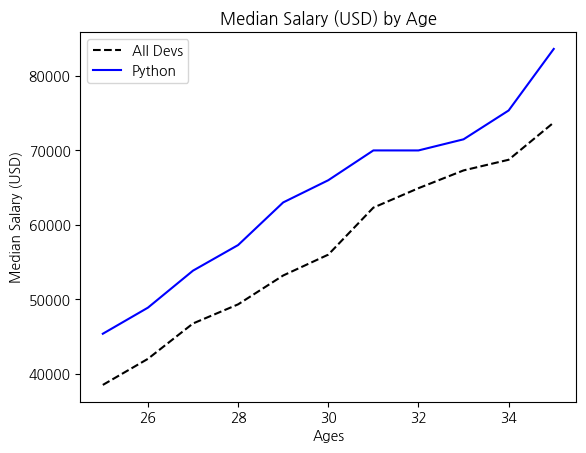

In [25]:
# change formatting of the plot
# method 1

fig, ax = plt.subplots()
ax.plot(ages_x, dev_y, 'k--', label='All Devs')
ax.plot(ages_x, py_dev_y, 'b', label='Python')


ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")
ax.legend()

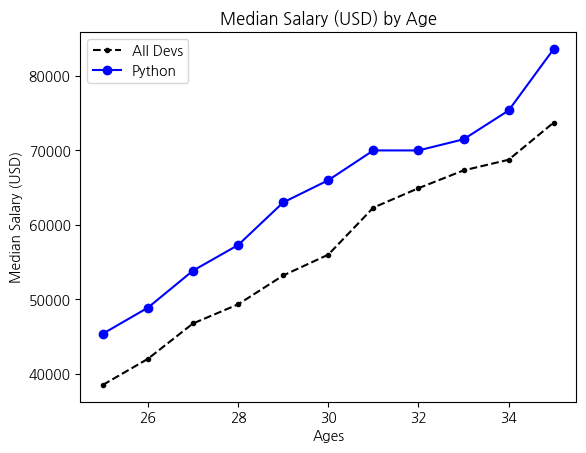

In [26]:
# proper method / more desirable
fig, ax = plt.subplots()
ax.plot(ages_x, dev_y, color='k', linestyle='--', marker='.', label='All Devs')
ax.plot(ages_x, py_dev_y, color='b', marker='o', label='Python')
ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")
plt.legend()

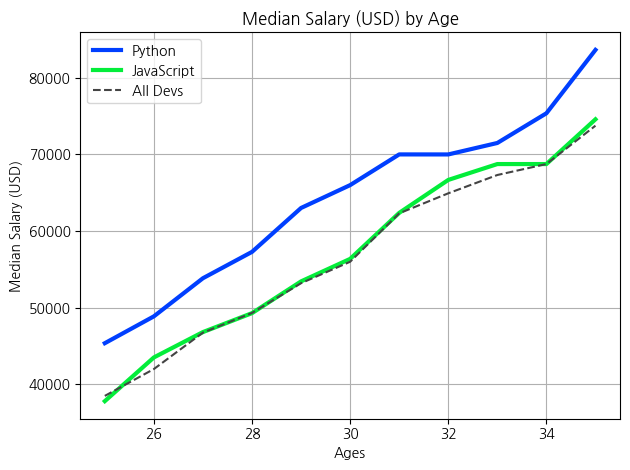

In [27]:
# using hexadecimal value for colors and linewidth
fig, ax = plt.subplots()
ax.plot(ages_x, py_dev_y, linewidth=3, label='Python')

ax.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')

ax.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")
ax.set_title("Median Salary (USD) by Age")
ax.legend()

# adding a grid
ax.grid(True)

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()


Text(0.0, 1.0, 'Line Plot (clean)')

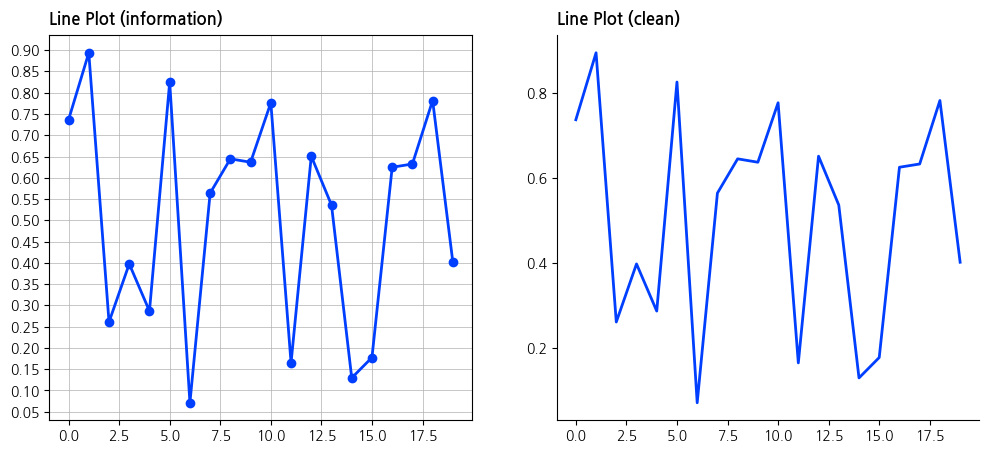

In [28]:
from matplotlib.ticker import MultipleLocator

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


np.random.seed(230709)

x = np.arange(20)
y = np.random.rand(20)


# Ax1
axes[0].plot(x, y,
         marker='o',
         linewidth=2)

axes[0].yaxis.set_major_locator(MultipleLocator(0.05))    
axes[0].grid(linewidth=0.5)    


# Ax2
axes[1].plot(x, y,
       linewidth=2,)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)




axes[0].set_title(f"Line Plot (information)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')
axes[1].set_title(f"Line Plot (clean)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')


### 강조

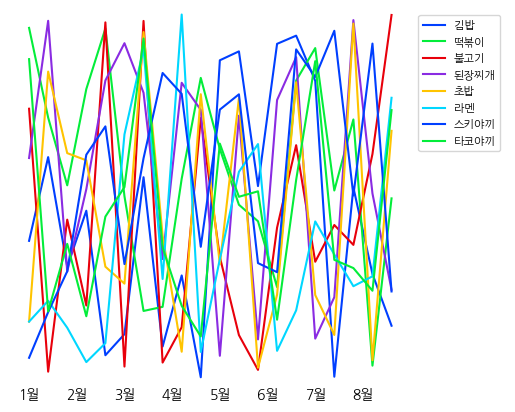

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
np.random.seed(42)  # For reproducibility

# Generate random data for 10 line graphs
food = ['김밥','떡볶이','불고기','된장찌개','초밥','라멘','스키야끼','타코야끼','피자','파스타','스테이크','햄버거']
data = pd.DataFrame(np.random.rand(20, 8), columns=[name for name in food[:8]])

# Create a figure and axis objects
fig, ax = plt.subplots()

# Iterate through the columns of the DataFrame to create line graphs
for column in data.columns:
    ax.plot(data.index, 
            data[column], 
            label=column,
           )


# Add a legend to the plot
ax.legend(prop={'size': 8})
ax.set_ylim([0,1])
ax.set_xlim([-1,25])
ax.set_xticks(ticks = np.arange(0, 20, step=2.5), labels = ['1월','2월','3월','4월','5월','6월','7월','8월'])
ax.set_yticks([])
ax.tick_params(left = False, bottom = False)

for location in ['top','bottom','left','right']:
     ax.spines[location].set_visible(False)


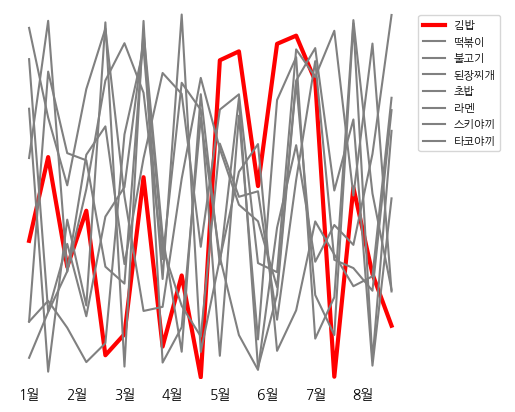

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
np.random.seed(42)  # For reproducibility

# Generate random data for 10 line graphs
food = ['김밥','떡볶이','불고기','된장찌개','초밥','라멘','스키야끼','타코야끼','피자','파스타','스테이크','햄버거']
data = pd.DataFrame(np.random.rand(20, 8), columns=[name for name in food[:8]])

# Create a figure and axis objects
fig, ax = plt.subplots()

# Iterate through the columns of the DataFrame to create line graphs
for column in data.columns:
    ax.plot(data.index, data[column], label=column, color='gray')

# Choose the line graph to highlight (let's assume it's the first column)
highlight_column = data.columns[0]

# Set the color for the highlighted line graph
highlight_color = 'red'

# Get the line artist object for the highlighted line graph
highlight_line = ax.lines[data.columns.get_loc(highlight_column)]

# Set the linewidth and color of the highlighted line graph
highlight_line.set_linewidth(3)
highlight_line.set_color(highlight_color)

# Add a legend to the plot
ax.legend(prop={'size': 8})
ax.set_ylim([0,1])
ax.set_xlim([-1,25])
ax.set_xticks(np.arange(0, 20, step=2.5),['1월','2월','3월','4월','5월','6월','7월','8월'])
ax.set_yticks([])
plt.tick_params(left = False, bottom = False)

for location in ['top','bottom','left','right']:
     ax.spines[location].set_visible(False)
# Show the plot
plt.show()

### 간격

- 첫번째 그래프는 간격 조절을 하지 않고 그린 그래프입니다. 
- 두번째 그래프를 보면 matplotlib은 plot을 그릴 때 자동으로 간격을 조정해주는 기능이 있습니다. 
- 세번째 그래프는 실제로 어떤 데이터가 들어있는지 확인을 할 수 있습니다.

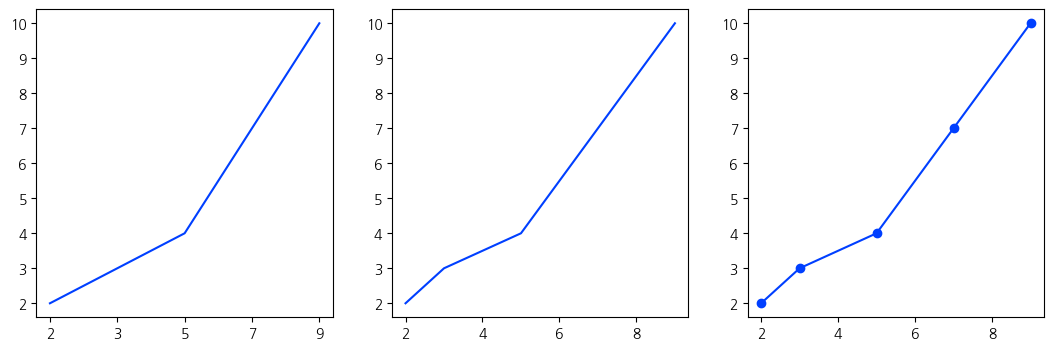

In [31]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].plot([str(i) for i in x], y)
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')


### 보간법

https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/

https://www.kaggle.com/datasets/dgawlik/nyse?resource=download

In [19]:
stock = pd.read_csv('./prices.csv')
stock.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index("date", inplace = True)
stock.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [21]:
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


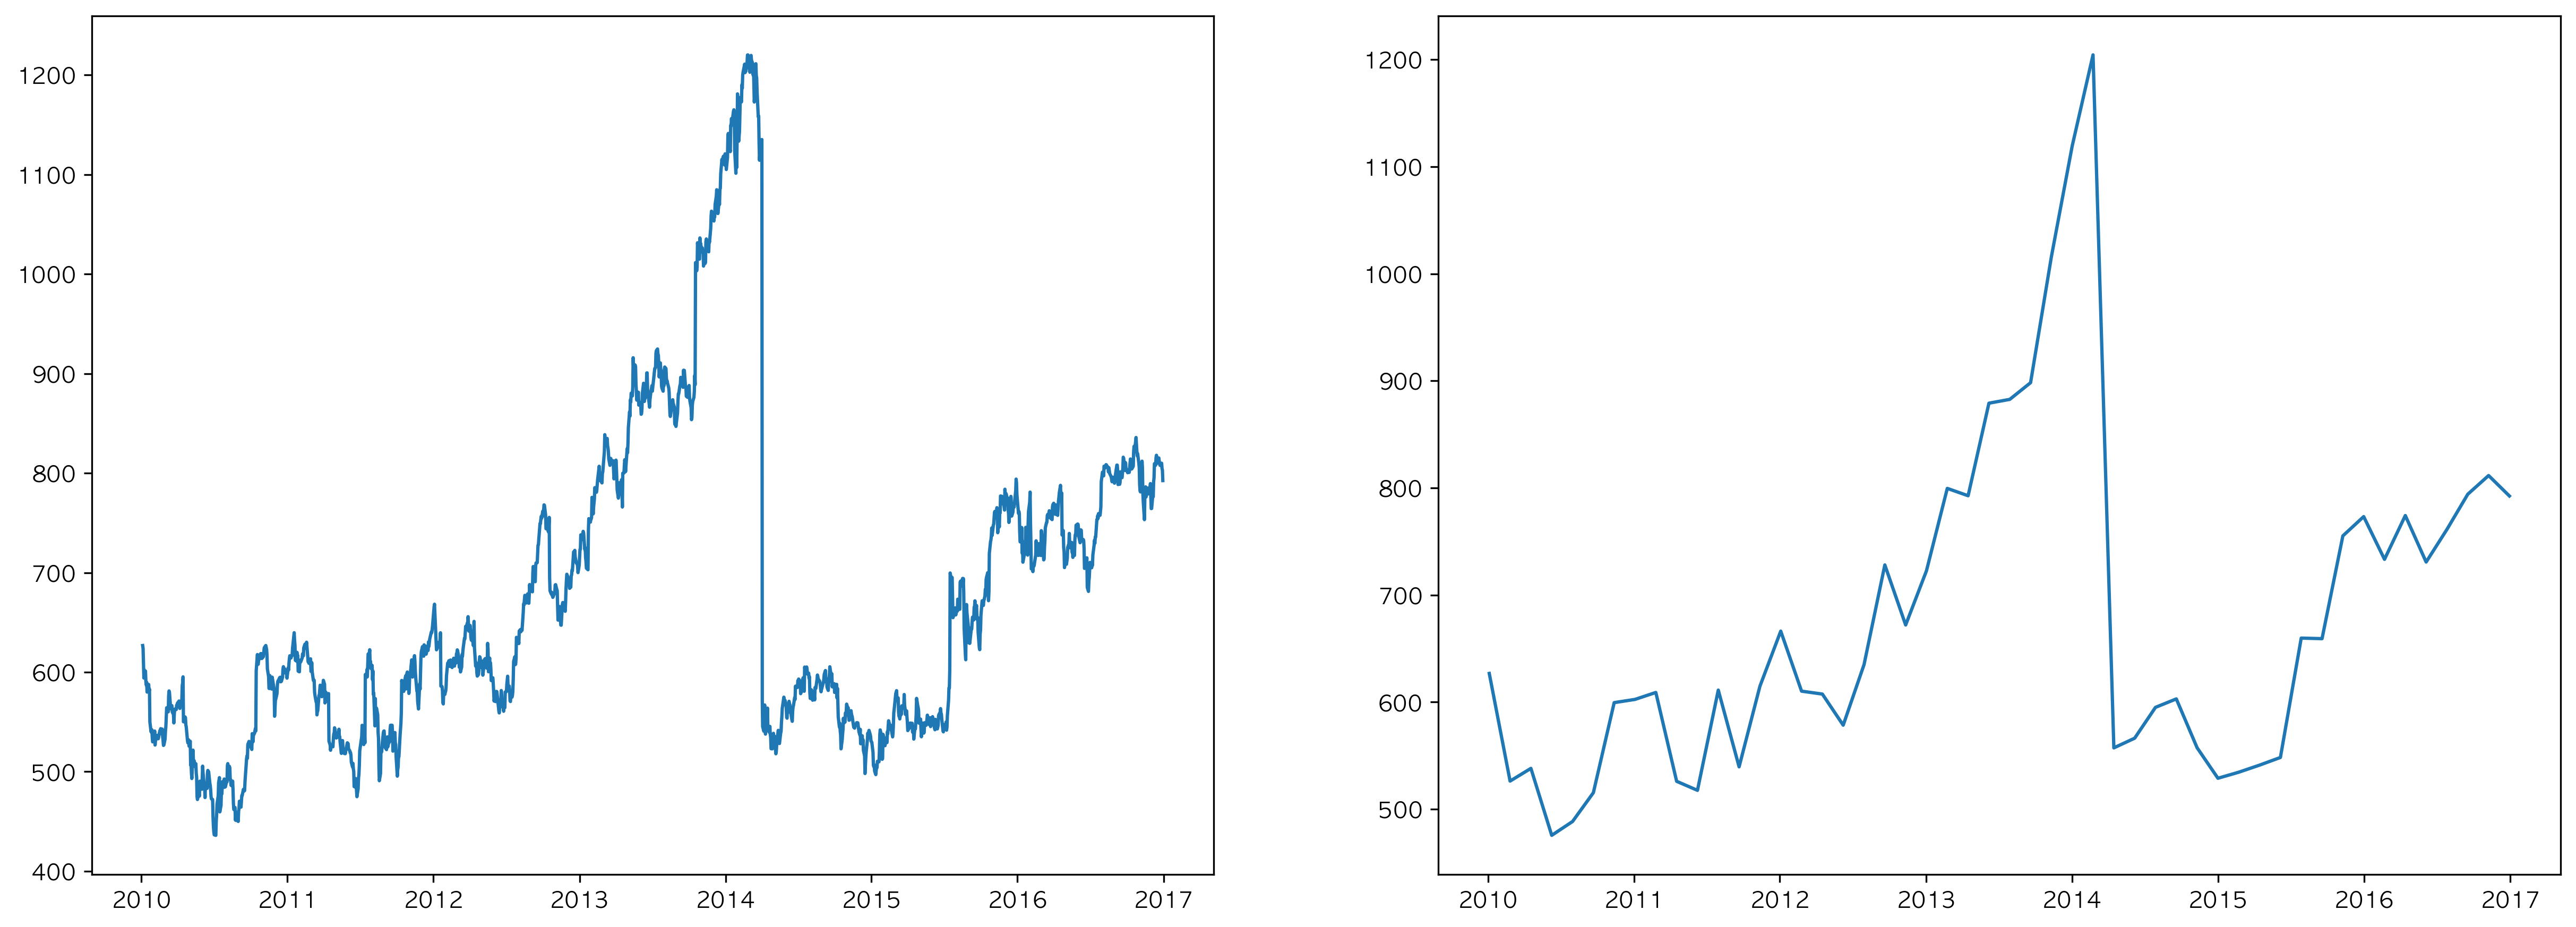

In [22]:
from scipy.interpolate import make_interp_spline
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np)
value_np_smooth = spl(date_num_smooth)


# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)


plt.show()

### 게슈탈트 원리

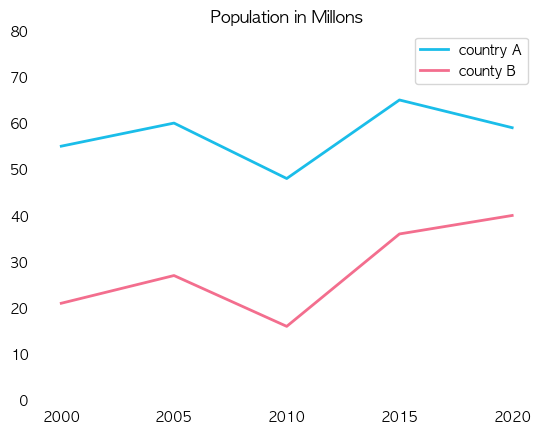

In [23]:
fig, ax = plt.subplots()


x1 = [1,2,3,4,5]
y1 = [55, 60, 48, 65, 59]
y2 = [21, 27, 16, 36, 40]
ax.plot(x1,y1, 
        label='country A',
        linewidth=2,
        color='#1ABDE9')
ax.plot(x1,y2, 
        label='county B',
        linewidth=2,
        color='#F36E8E')

ax.set_title('Population in Millons')
ax.set_ylim(0, 80)

plt.tick_params(left = False, bottom = False)
ax.set_xticks(ticks = [1,2,3,4,5], labels=['2000','2005','2010','2015','2020'])
ax.legend()

for location in ['top','bottom','left','right']:
     ax.spines[location].set_visible(False)

plt.show()

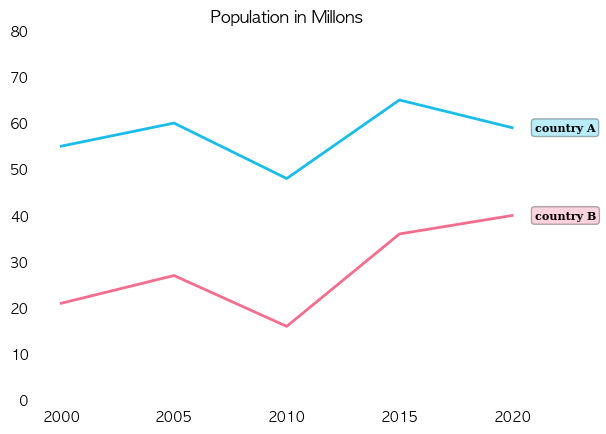

In [24]:
fig, ax = plt.subplots()


ax.plot(x1,y1, 
        label='country A',
        linewidth=2,
        color='#1ABDE9')
ax.plot(x1,y2, 
        label='county B',
        linewidth=2,
        color='#F36E8E')

ax.set_title('Population in Millons')
ax.set_ylim(0, 80)

#bounding box for categori
ax.text(x=5.2, y=59, s='country A',
        fontsize=8,
        fontweight='bold',
        fontfamily='serif',
        va='center', ha='left', 
        bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3)                #fc: face color
       )

#bounding box for categori
ax.text(x=5.2, y=40, s='country B',
        fontsize=8,
        fontweight='bold',
        fontfamily='serif',
        va='center', ha='left', 
        bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3)
       )

plt.tick_params(left = False, bottom = False)
ax.set_xticks(ticks = [1,2,3,4,5], labels=['2000','2005','2010','2015','2020'])

for location in ['top','bottom','left','right']:
     ax.spines[location].set_visible(False)

plt.show()

<Figure size 700x700 with 0 Axes>

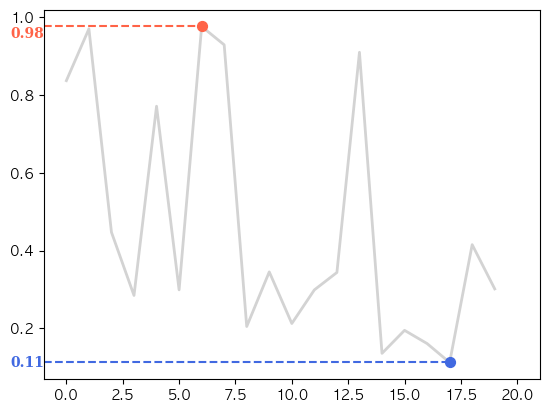

In [28]:
fig = plt.figure(figsize=(7, 7))

np.random.seed(97)

x = np.arange(20)
y = np.random.rand(20)

fig, ax = plt.subplots()
ax.plot(x, y,
       color='lightgray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2,
        linestyle='--', color='tomato'
       )

ax.scatter(x[np.argmax(y)], np.max(y), 
            c='tomato',s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue'
       )
ax.scatter(x[np.argmin(y)], np.min(y), 
            c='royalblue',s=50, zorder=20)

ax.text(x=-2.5, y=np.max(y), s=round(np.max(y),2),
        fontsize=10,
        fontweight='bold',
        fontfamily='serif',
        color = 'tomato',
        va='top'                   #vertical alies
       )

ax.text(x=-2.5, y=np.min(y), s=round(np.min(y),2),
        fontsize=10,
        fontweight='bold',
        fontfamily='serif',
        color = 'royalblue',
        va='center'               #verticl alies
       )

plt.show()

### scatter plot

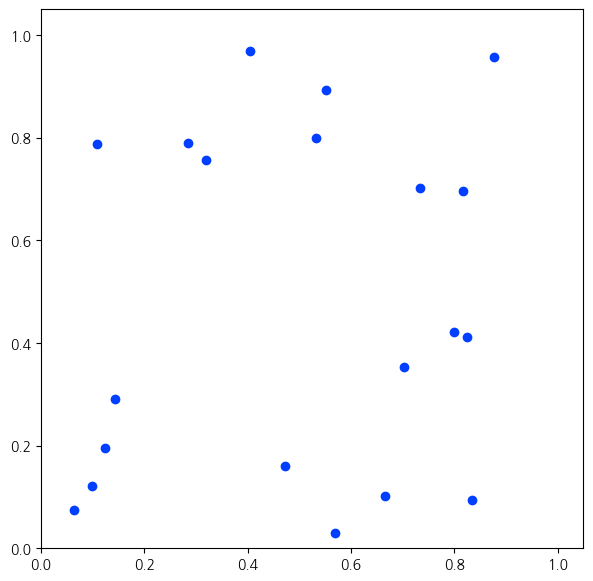

In [39]:
fig, ax = plt.subplots(figsize=(7, 7))

np.random.seed(230623)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x, y)
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)

plt.show()

In [40]:
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

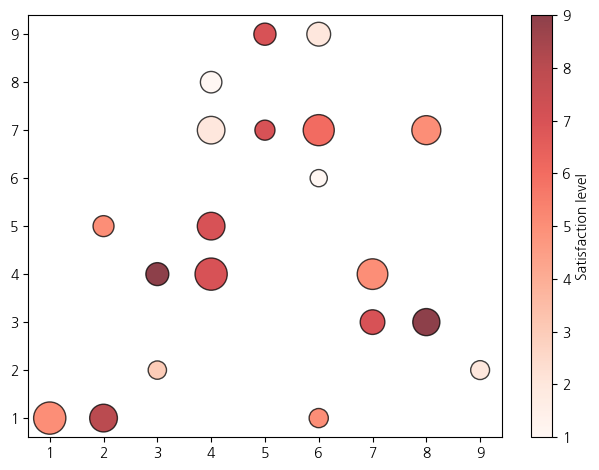

In [41]:
# s - size of dots
# c - color
# edgecolor - edges to the circles
# cmap - color map => https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# ax.scatter(x,  y, s=100, c='green', marker='x')

# ax.scatter(x,  y, s=100, c='red', edgecolor='black', 
#             linewidth=1, alpha=0.75)
import matplotlib.cm as cm

# color and size on a per mark basis
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
         538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]

fig, ax = plt.subplots()

pcm = ax.scatter(x, y, s=sizes, c=colors, cmap='Reds', edgecolor='black', 
            linewidth=1, alpha=0.75)
cbar = fig.colorbar(pcm)
cbar.set_label('Satisfaction level')


plt.tight_layout()


###  2019-05-31-data.csv
- view_count : 조회수
- likes : 좋아요 횟수
- ratio : 좋아요 싫어요 비율

In [42]:
data = pd.read_csv('2019-05-31-data.csv')
data.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [43]:
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

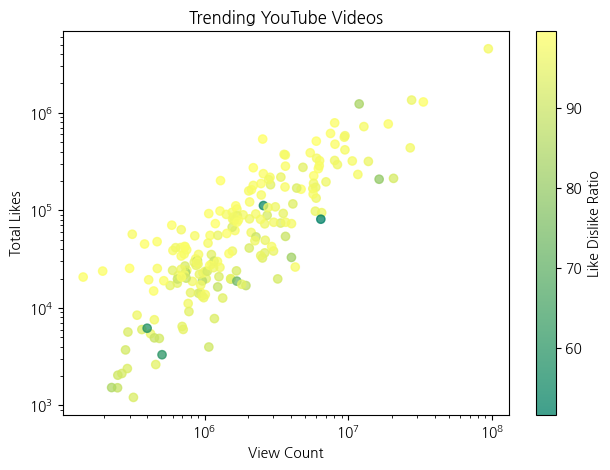

In [52]:
fig, ax = plt.subplots()

pcm = ax.scatter(view_count,  likes, 
#                  edgecolor='black', 
                 c=ratio,
                 cmap='summer', 
                 linewidth=1, alpha=0.75)

cbar = fig.colorbar(pcm)
cbar.set_label('Like Dislike Ratio')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Trending YouTube Videos')
ax.set_xlabel('View Count')
ax.set_ylabel('Total Likes')

fig.tight_layout()


### 국가별 평균수명과 1인당 GDP의 관계

- Country : 국가
- Year : 연도
- Life Expectancy : 기대 수명
- Children per Woman : 출산율
- Population : 인구
- Continent : 대륙
- Income per Person : 소득
- Child Mortality : 아동 사망률
- 출처 : https://drive.google.com/file/d/1bm2ImU_MD-fvoNbIr-eTbAEUcipnfJZP/view

In [45]:
data = pd.read_csv('hans_rosling_v4.csv')
data = data[data["Year"]=='Y2015']
data.head()

,Country,Year,Life Expectancy,Children per Woman,Population,Continent,Income per Person,Child Mortality
53,Afghanistan,Y2015,53.8,4.47,32.5,Asia,1750,73.2
107,Albania,Y2015,78.0,1.78,2.9,Europe,11000,14.0
161,Algeria,Y2015,76.4,2.71,39.7,Africa,13700,25.5
215,Angola,Y2015,59.6,5.65,25.0,Africa,6230,86.5
269,Argentina,Y2015,76.5,2.15,43.4,Americas,19100,11.6


### 국가별로 데이터 살펴보기

In [46]:
data['Country'].unique()        #Unique 유일값

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Mal

### 무의미한 색 분류 주의하기
시각 속성 중 색은 데이터 시각화에서 강력합니다. 하지만 잘 사용하지 못한다면 그 효과를 볼 수 없을 뿐더러 사람들에게 반감을 불러일으킬 수 있습니다.

/tmp/ipykernel_1303/2075396226.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


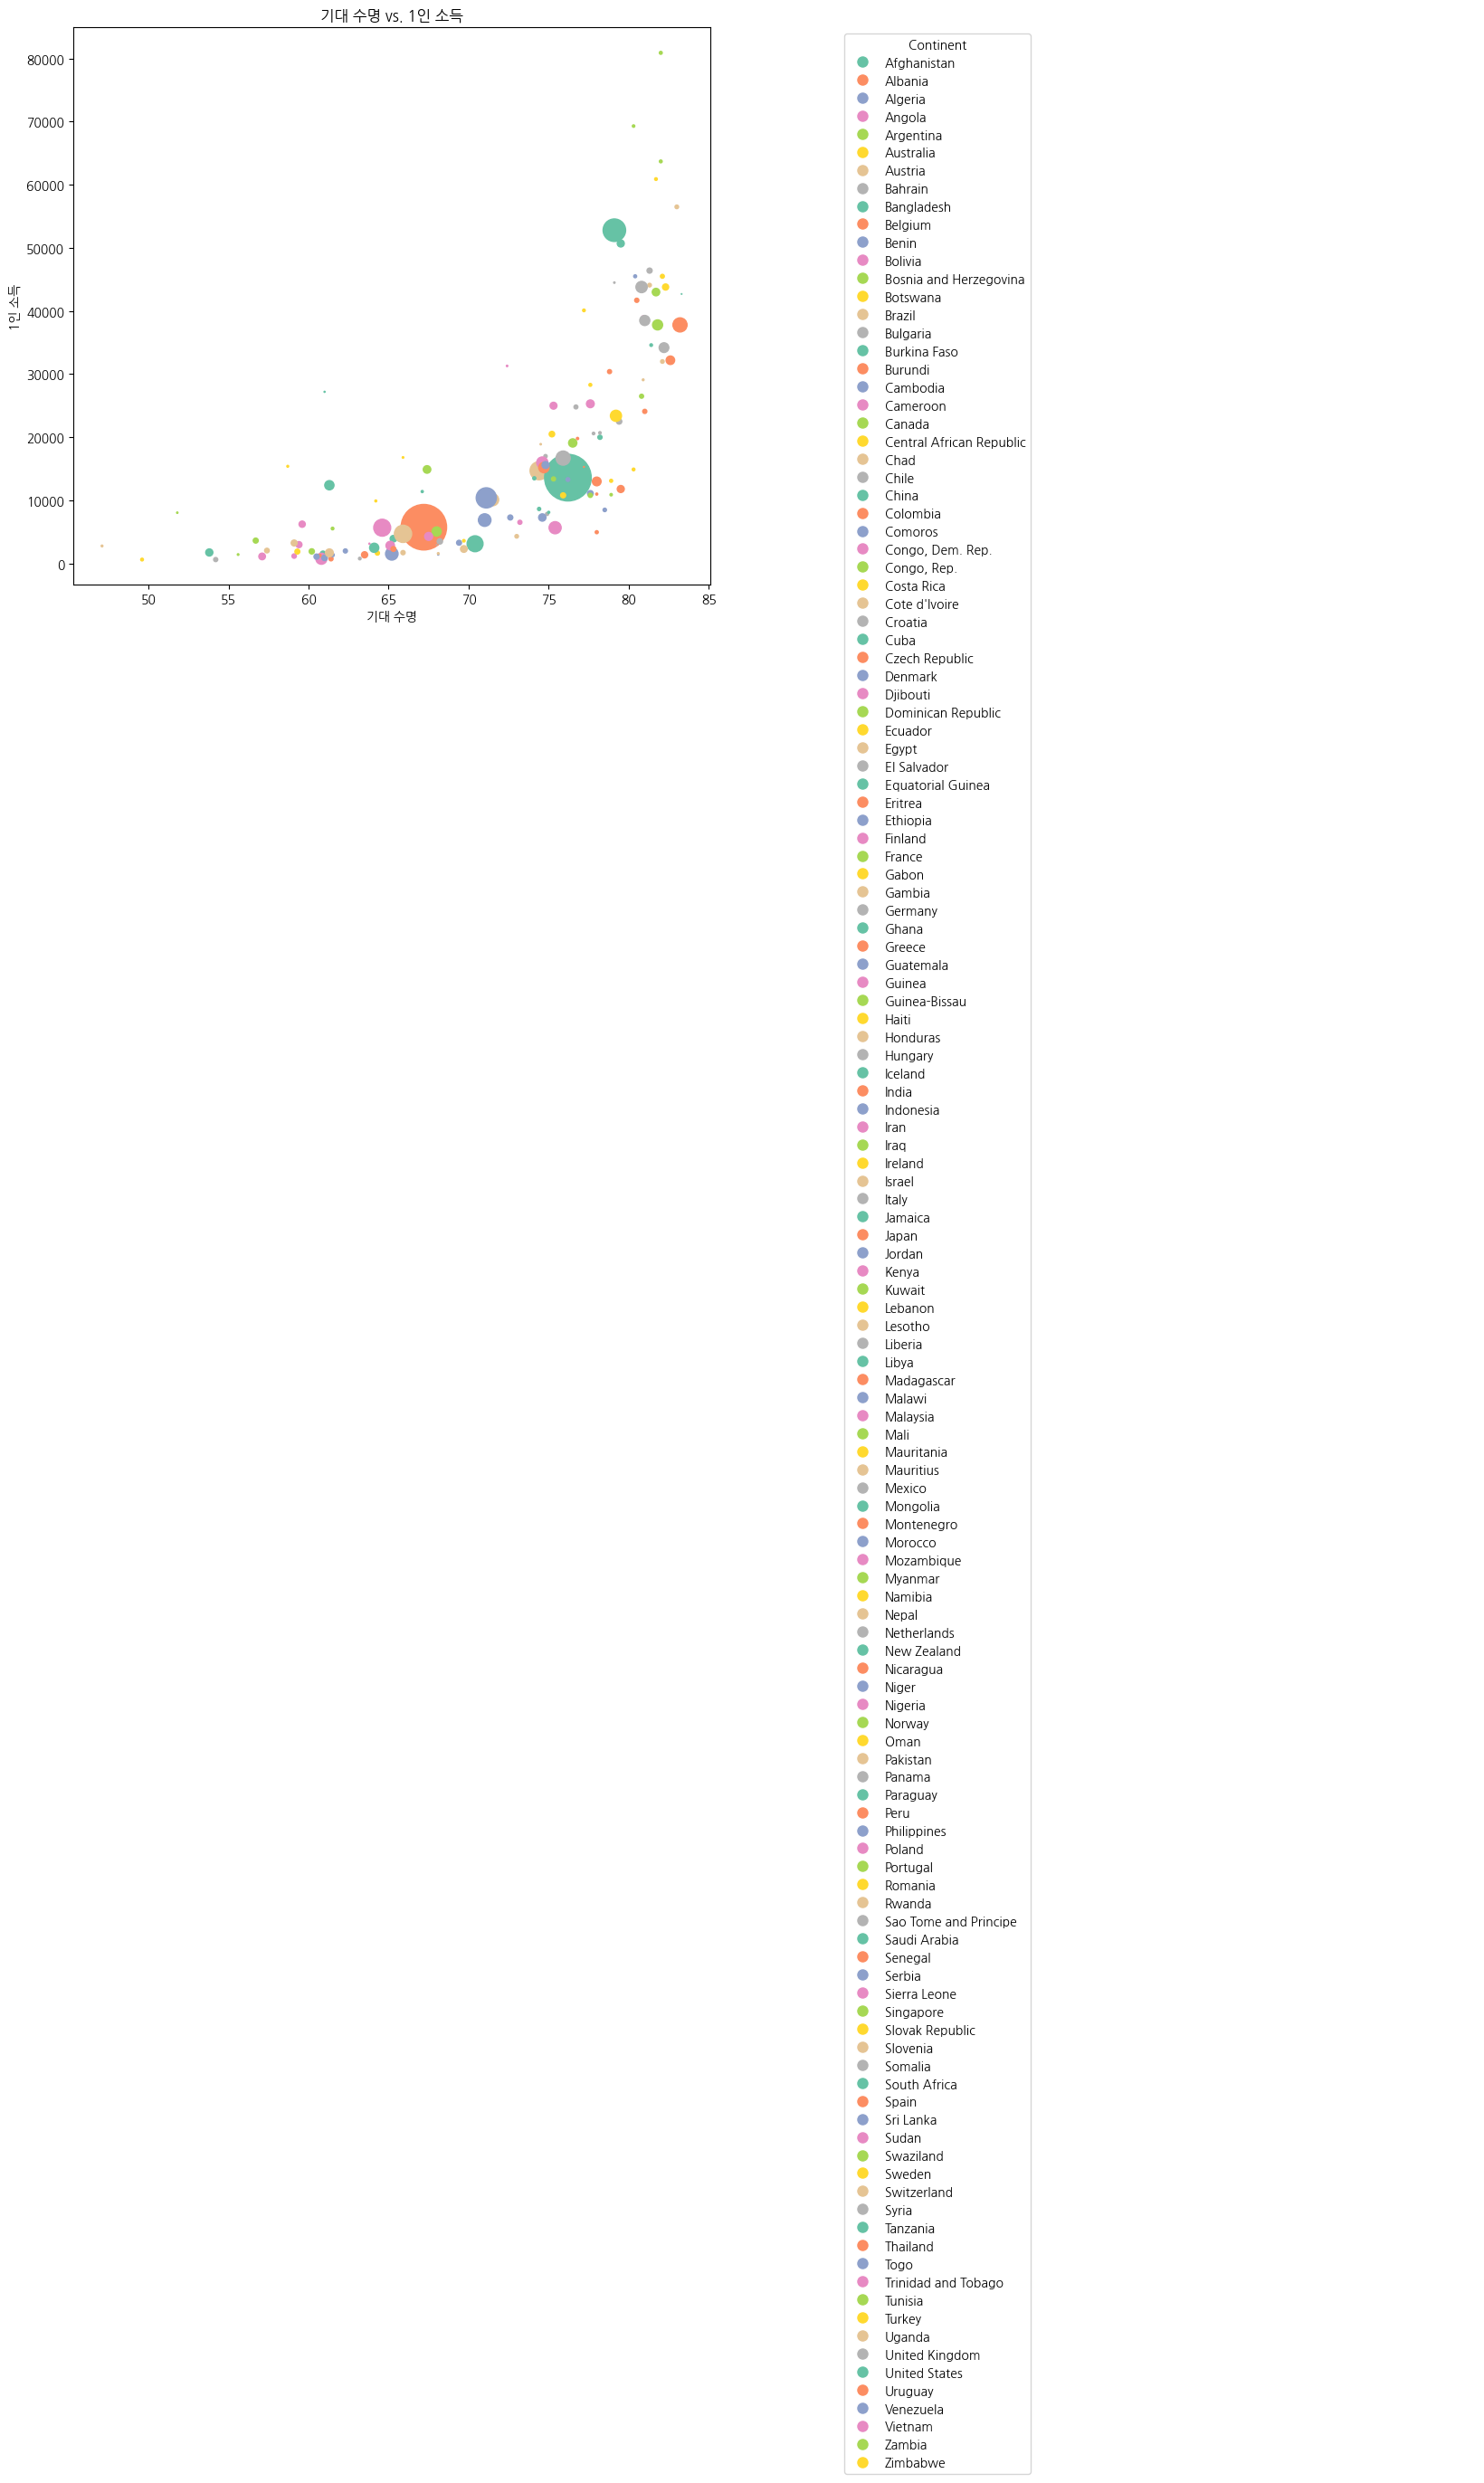

In [47]:
# Define colors for each country
country = data['Country'].unique()
colors = sns.color_palette("Set2", n_colors=len(country))

country_colors = {cou : color for cou, color in zip(country, colors)}

fig, axes = plt.subplots(1,2,figsize=(20,8))
# Create the scatter plot
axes[0].scatter(data['Life Expectancy'], data['Income per Person'],
            s=data['Population'], c=data['Country'].map(country_colors), label=data['Country'])


# Add labels and title
axes[0].set_xlabel('기대 수명')
axes[0].set_ylabel('1인 소득')
axes[0].set_title('기대 수명 vs. 1인 소득')

# Add a legend for the country
legend_handles = [plt.Line2D([], [], marker='o', color='w', markersize=10, markerfacecolor=color, label=cou)
                  for cou, color in country_colors.items()]
axes[1].legend(handles=legend_handles, title='Continent',loc='upper left')
for loc in ['top','bottom','left','right']:
    axes[1].spines[loc].set_visible(False)
axes[1].tick_params(left = False, bottom = False)
axes[1].set_xticks([])
axes[1].set_yticks([])
fig.tight_layout()

모든 국가를 표현하는데 필요한 색의 수가 부족하고 범례가 길어 어떤 국가가 어떤 데이터를 의미하는지 파악하기 힘듭니다. 

### 색 한가지만 사용하기
위 그래프에서 어떤 정보를 파악할 수 있었나요?

- 경향성 파악 : 1인 소득이 높을수록 평균 수명이 높아집니다.

Text(0.5, 1.0, '기대 수명 vs. 1인 소득')

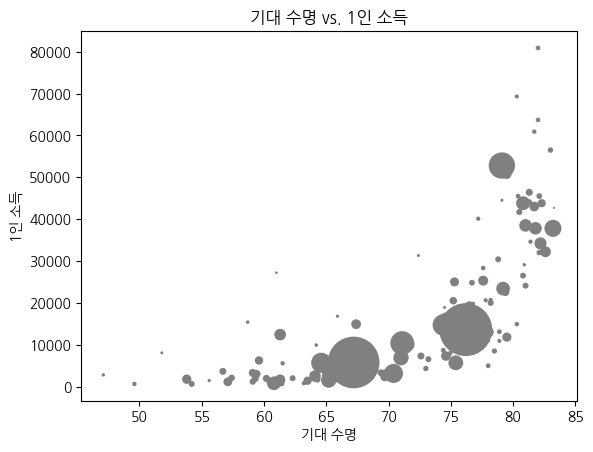

In [48]:
# Create the scatter plot
fit, ax = plt.subplots()
ax.scatter(data['Life Expectancy'], data['Income per Person'],
            s=data['Population'], c='gray')

# Add labels and title
ax.set_xlabel('기대 수명')
ax.set_ylabel('1인 소득')
ax.set_title('기대 수명 vs. 1인 소득')


위 그래프를 통해 국가별로 색상을 나타낸 그래프와 달리 범례가 필요없고 경향성 정보를 파악하는데 충분합니다.

### 색깔 효율적으로 사용하기
대륙별로 구별하기 -> 각 나라의 위치, 공간 정보를 함축

In [49]:
data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

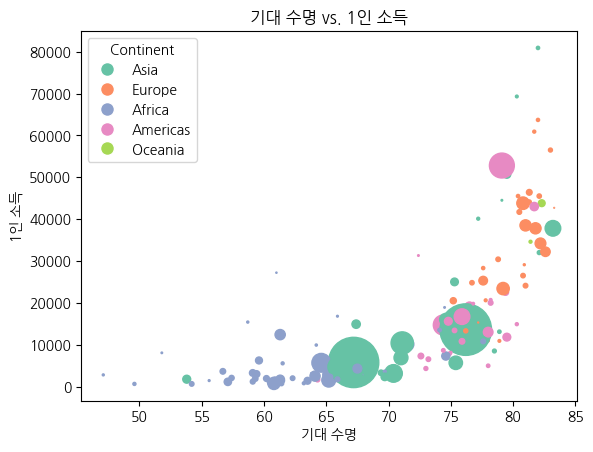

In [50]:
fig, ax = plt.subplots()

# Define colors for each continent
continent = data['Continent'].unique()
colors = sns.color_palette("Set2",n_colors=len(continent))

continent_colors = {cont : color for cont, color in zip(continent, colors)}

# Create the scatter plot
ax.scatter(data['Life Expectancy'], data['Income per Person'],
            s=data['Population'], c=data['Continent'].map(continent_colors))

# Add labels and title
ax.set_xlabel('기대 수명')
ax.set_ylabel('1인 소득')
ax.set_title('기대 수명 vs. 1인 소득')

# Add a legend for the continents
legend_handles = [plt.Line2D([], [], marker='o', color='w', markersize=10, markerfacecolor=color, label=continent)
                  for continent, color in continent_colors.items()]
ax.legend(handles=legend_handles, title='Continent')

